# Analysis of Zeek logs

In [4]:
import pandas as pd
import json
import gzip
import glob
import os
import seaborn as sb

%matplotlib inline
import matplotlib.pyplot as plt


### Extract gz files

In [3]:
path = './data/2020-06-03/' 
all_files = glob.glob(os.path.join(path,"http*.log.gz"))

In [141]:
df_list = []

for jsonfilename in all_files:
    with gzip.GzipFile(jsonfilename, 'r') as json_file:
        for line in json_file:
            json_data = json.loads(line)

            timestamp = json_data['ts']
            source_ip = json_data['id.orig_h']
            source_port = json_data['id.orig_p']
            destination_ip = json_data['id.resp_h']
            destination_port = json_data['id.resp_p']

            if 'method' in json_data:
                http_method = json_data['method']
            else:
                http_method = 'NaN'

            df_list.append({'timestamp':pd.to_datetime(timestamp),
                           'source_ip': str(source_ip),
                           'source_port': int(source_port),
                           'destination_ip':str(destination_ip),
                           'destination_port':int(destination_port),
                           'method':str(http_method)})


Create data frame from dictionary

In [142]:
http_df = pd.DataFrame(df_list, columns =['timestamp', 'source_ip', 'source_port', 'destination_ip', 'destination_port', 'method'])
http_df.head()

,timestamp,source_ip,source_port,destination_ip,destination_port,method
0,1970-01-01 00:00:01.591124408,111.119.188.11,43991,115.186.176.141,8080,OPTIONS
1,1970-01-01 00:00:01.591124409,111.119.188.11,43990,115.186.176.141,8080,NaN
2,1970-01-01 00:00:01.591124385,111.119.188.11,43989,115.186.176.141,8080,GET
3,1970-01-01 00:00:01.591124410,111.119.188.11,43992,115.186.176.141,8080,OPTIONS
4,1970-01-01 00:00:01.591124412,111.119.188.11,43993,115.186.176.141,8080,GET


In [143]:
http_df.shape

(13653, 6)

*Store dataframe to csv*

In [144]:
http_df.to_csv('./data/2020-06-03/http_logs.csv', index = False)

In [145]:
http_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13653 entries, 0 to 13652
Data columns (total 6 columns):
timestamp           13653 non-null datetime64[ns]
source_ip           13653 non-null object
source_port         13653 non-null int64
destination_ip      13653 non-null object
destination_port    13653 non-null int64
method              13653 non-null object
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 640.1+ KB


### Attackers HTTP Requests

In [5]:
df_merged = pd.read_csv('./data/2020-06-03/http_logs.csv')

In [11]:
df_merged.head()

,timestamp,source_ip,source_port,destination_ip,destination_port,method
0,1970-01-01 00:00:01.591124408,111.119.188.11,43991,115.186.176.141,8080,OPTIONS
1,1970-01-01 00:00:01.591124409,111.119.188.11,43990,115.186.176.141,8080,NaN
2,1970-01-01 00:00:01.591124385,111.119.188.11,43989,115.186.176.141,8080,GET
3,1970-01-01 00:00:01.591124410,111.119.188.11,43992,115.186.176.141,8080,OPTIONS
4,1970-01-01 00:00:01.591124412,111.119.188.11,43993,115.186.176.141,8080,GET


###  What are Attackers Source Ip's

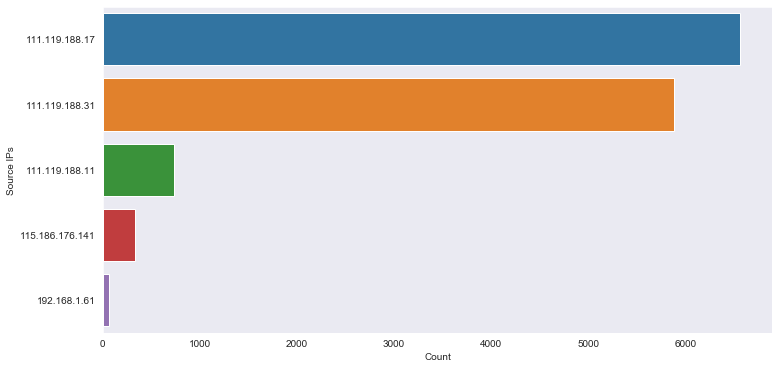

In [14]:
plt.figure(figsize=(12,6))
sb.countplot(data=df_merged, y='source_ip', order=df_merged.source_ip.value_counts().iloc[:5].index,
            orient = 'h');
sb.set_style("dark")
plt.ylabel('Source IPs')
plt.xlabel('Count');

### Attackers Source Port

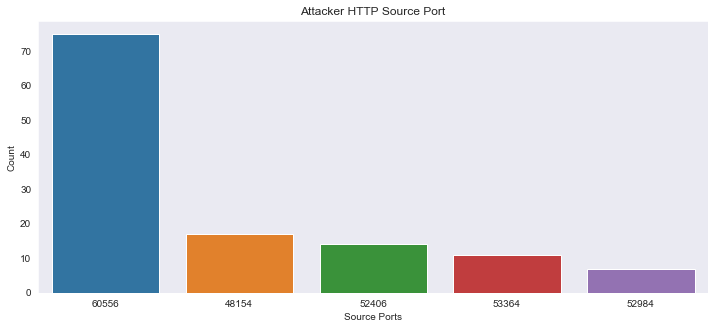

In [30]:

plt.figure(figsize=(12,5))
sb.countplot(data=df_merged, x='source_port', order=df_merged.source_port.value_counts().iloc[:5].index,
            orient = 'h');
sb.set_style("dark")
plt.title('Attacker HTTP Source Port')
plt.ylabel('Count')
plt.xlabel('Source Ports');

### Attackers Destination IP

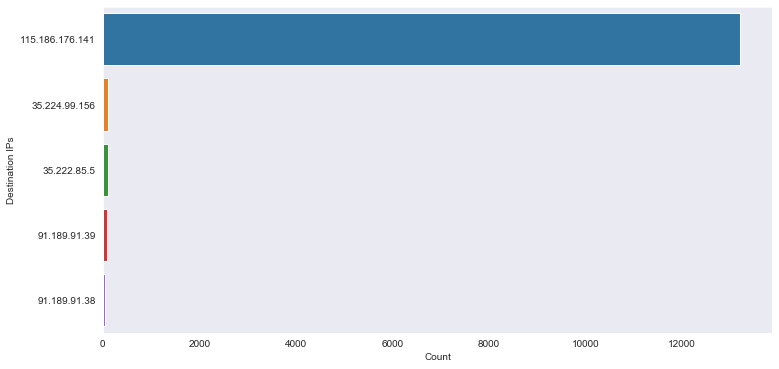

In [17]:
plt.figure(figsize=(12,6))
sb.countplot(data=df_merged, y='destination_ip', order=df_merged.destination_ip.value_counts().iloc[:5].index,
            orient = 'h');
sb.set_style("whitegrid")
plt.ylabel('Destination IPs')
plt.xlabel('Count');

### Attackers Destination PORTs

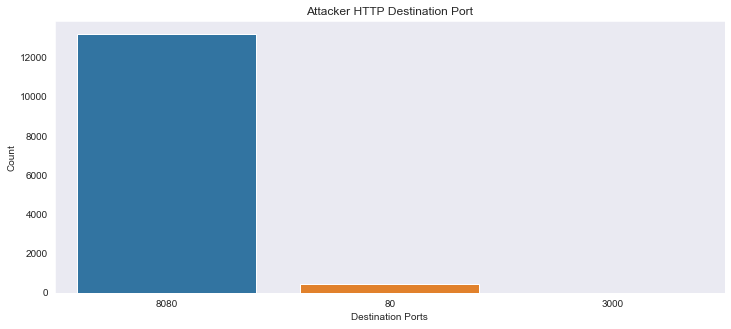

In [29]:
plt.figure(figsize=(12,5))
sb.countplot(data=df_merged, x='destination_port', order=df_merged.destination_port.value_counts().iloc[:5].index,
            orient = 'h');
sb.set_style("dark")
plt.title('Attacker HTTP Destination Port')
plt.ylabel('Count')
plt.xlabel('Destination Ports');

### HTTP Methods

In [6]:
sumpie = df_merged['method'].value_counts()

In [8]:
sumpie

OPTIONS    6586
GET        5968
POST         29
HEAD          1
Name: method, dtype: int64

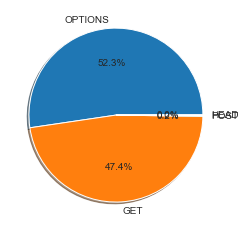

In [55]:
# plt.pie(sumpie, labels= sumpie.index, autopct='%1.1f%%', shadow=True)
# plt.show();